<a href="https://colab.research.google.com/github/thanadolch/KKU_data_mining/blob/master/Test_DecisonTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import os

In [ ]:
path = '/content/drive/My Drive/Test DQ'

In [ ]:
A = os.path.join(path,'bank.csv')
B = pd.read_csv(A)
B


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [ ]:
C = B.drop(columns=['age','job','default','balance','contact','day','month','duration','campaign','pdays','previous','poutcome','deposit','education','housing','loan'])
C

,marital
0,married
1,married
2,married
3,married
4,married
...,...
11157,single
11158,married
11159,single
11160,married


In [ ]:
AA = B.drop(columns=['age','job','default','balance','contact','day','month','duration','campaign','pdays','previous','poutcome','deposit','marital'])
AA


,education,housing,loan
0,secondary,yes,no
1,secondary,no,no
2,secondary,yes,no
3,secondary,yes,no
4,tertiary,no,no
...,...,...,...
11157,primary,yes,no
11158,secondary,no,no
11159,secondary,no,no
11160,secondary,no,yes


In [ ]:
target = B['marital']
target

0        married
1        married
2        married
3        married
4        married
          ...   
11157     single
11158    married
11159     single
11160    married
11161    married
Name: marital, Length: 11162, dtype: object

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
x = AA.values
x

array([[2, 1, 0],
       [2, 0, 0],
       [2, 1, 0],
       ...,
       [2, 0, 0],
       [2, 0, 1],
       [2, 0, 0]])

In [ ]:
AA['housing'] = AA['housing'].map({'yes': 1,'no': 0})
AA

,education,housing,loan
0,secondary,1,no
1,secondary,0,no
2,secondary,1,no
3,secondary,1,no
4,tertiary,0,no
...,...,...,...
11157,primary,1,no
11158,secondary,0,no
11159,secondary,0,no
11160,secondary,0,yes


In [ ]:
AA['loan'] = AA['loan'].map({'yes' : 1,'no' : 0})
AA

,education,housing,loan
0,secondary,1,0
1,secondary,0,0
2,secondary,1,0
3,secondary,1,0
4,tertiary,0,0
...,...,...,...
11157,primary,1,0
11158,secondary,0,0
11159,secondary,0,0
11160,secondary,0,1


In [ ]:
AA['education'].value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

In [ ]:
AA['education'] = AA['education'].map({'unknown':0,'primary':1,'secondary':2,'tertiary':3})
AA

,education,housing,loan
0,2,1,0
1,2,0,0
2,2,1,0
3,2,1,0
4,3,0,0
...,...,...,...
11157,1,1,0
11158,2,0,0
11159,2,0,0
11160,2,0,1


In [ ]:
B['marital'].value_counts() 

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

In [ ]:
target = target.map({'divorced':0,'single':1,'married':2})
target

0        2
1        2
2        2
3        2
4        2
        ..
11157    1
11158    2
11159    1
11160    2
11161    2
Name: marital, Length: 11162, dtype: int64

In [ ]:
y = target.values
y

array([2, 2, 2, ..., 1, 2, 2])

In [ ]:
myTree = DecisionTreeClassifier(criterion='entropy')
myTree.fit(x[:-50,:],y[:-50])



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
myTree.predict(x[-10:,:])

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
myTree.score(x,y)

0.5689840530370901

In [ ]:

from sklearn.tree import plot_tree

[Text(167.4, 195.696, 'X[0] <= 1.5\nentropy = 1.348\nsamples = 11112\nvalue = [1286, 3509, 6317]'),
 Text(83.7, 152.208, 'X[0] <= 0.5\nentropy = 1.186\nsamples = 1991\nvalue = [254, 353, 1384]'),
 Text(41.85, 108.72, 'X[1] <= 0.5\nentropy = 1.318\nsamples = 496\nvalue = [51, 157, 288]'),
 Text(20.925, 65.232, 'X[2] <= 0.5\nentropy = 1.356\nsamples = 322\nvalue = [34, 116, 172]'),
 Text(10.4625, 21.744, 'entropy = 1.361\nsamples = 313\nvalue = [33, 116, 164]'),
 Text(31.387500000000003, 21.744, 'entropy = 0.503\nsamples = 9\nvalue = [1, 0, 8]'),
 Text(62.775000000000006, 65.232, 'X[2] <= 0.5\nentropy = 1.209\nsamples = 174\nvalue = [17, 41, 116]'),
 Text(52.3125, 21.744, 'entropy = 1.213\nsamples = 157\nvalue = [15, 38, 104]'),
 Text(73.2375, 21.744, 'entropy = 1.16\nsamples = 17\nvalue = [2, 3, 12]'),
 Text(125.55000000000001, 108.72, 'X[1] <= 0.5\nentropy = 1.104\nsamples = 1495\nvalue = [203, 196, 1096]'),
 Text(104.625, 65.232, 'X[2] <= 0.5\nentropy = 1.148\nsamples = 757\nvalue = [

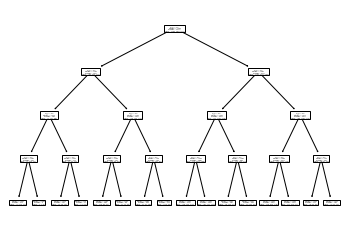

In [ ]:
plot_tree(myTree)